In [2]:
import pandas as pd
import nltk.data
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
from nltk.util import bigrams 
from nltk.tokenize import TreebankWordTokenizer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# can reference to this website if interested: 
# https://medium.com/@sandeep.panchal545/sentiment-analysis-with-vader-label-the-unlabeled-data-8dd785225166

# You might need to install some of the packages, let me know if you need help :)

ModuleNotFoundError: No module named 'nltk'

In [ ]:
# load in data
df = pd.read_csv("./Data/mar-apr_All(without COVID-19).csv")

In [ ]:
df.head()

In [ ]:
# extract text
df_text = df.iloc[:,1]
df_text

In [ ]:
# Doing Sentiment Analysis for each candidates
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

In [ ]:
# Test each token as positive, negative or neutral, and generate a score

df_table = []
for i in df['text']:
    df_scores = {}
    df_scores['sia_positive'] = sia.polarity_scores(i)['pos']*100
    df_scores['sia_negative'] = sia.polarity_scores(i)['neg']*100
    df_scores['sia_neutral'] = sia.polarity_scores(i)['neu']*100
    df_scores['sia_compound'] = sia.polarity_scores(i)['compound']
    
    df_table.append(df_scores)
    
#print(sia_table)

In [1]:
# See the results
df_table = pd.DataFrame(df_table)
#df_table=df_table.sort_values(by='sia_compound' , ascending=False).reset_index(drop=True)

print(df_table)

NameError: name 'pd' is not defined

In [10]:
# See what kinds of sentiment appear more
df_mean = df_table.mean()
df_mean = df_mean.to_frame().transpose()
df_mean = df_mean.rename(index={0:'Mar - Apr 2020'})
df_mean

,sia_positive,sia_negative,sia_neutral,sia_compound
Mar - Apr 2020,8.719048,6.878571,84.4,0.422333


我怀疑这个可能有点儿问题，其实我们上学期学nlp学得也不是那么透彻（不好意思上课可能还是糊弄比较多，内心里都是这节课赶紧结束 >_<）。
1. mean可能不是特别对
2. 从目前的compound value看
    >x >= 0.05 positive | 
    -0.05 < x < 0.05 neutral | 
    x <= -0.05 negative
3. 我上网搜了搜，大部分pos，neg，neu的value都是0到1的，我不知道为啥每篇文章会有这么高的数值，可以再研究一下
    >说不定还是需要去除干扰词，然后分句子
4. 还有一个想法就是按照media也分一下看看，但不知道有什么用没有。

In [20]:
# This step can be generated after we achieve all three periods of time.

# df = pd.DataFrame({
#     'sia_positve': [8.795111, 9.393333, 9.904222],
#     'sia_negative': [6.300889, 5.545556, 5.417778],
#     'sia_neutral': [84.904889, 85.062222, 84.674000]
# }, index=['Nov - Dec 2019', 'Jan - Feb 2020', 'Mar - Apr 2020'])
# df

,sia_positve,sia_negative,sia_neutral
Trump,8.795111,6.300889,84.904889
Biden,9.393333,5.545556,85.062222
Sanders,9.904222,5.417778,84.674000


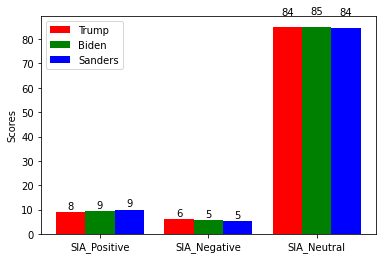

In [21]:
# This step can also be generated after we achieve the full results.

# N = 3
# ind = np.arange(N)  # the x locations for the groups
# width = 0.27       # the width of the bars

# fig = plt.figure()
# ax = fig.add_subplot(111)

# yvals = [8.795111, 6.300889,84.904889]
# rects1 = ax.bar(ind, yvals, width, color='r')
# zvals = [9.393333, 5.545556, 85.062222]
# rects2 = ax.bar(ind+width, zvals, width, color='g')
# kvals = [9.904222, 5.417778, 84.674000]
# rects3 = ax.bar(ind+width*2, kvals, width, color='b')


# ax.set_ylabel('Scores')
# ax.set_xticks(ind+width)
# ax.set_xticklabels( ('SIA_Positive', 'SIA_Negative', 'SIA_Neutral') )
# ax.legend((rects1[0], rects2[0], rects3[0]), ('Trump', 'Biden', 'Sanders'), loc = 'best' )


# def autolabel(rects):
#     for rect in rects:
#         h = rect.get_height()
#         ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

# plt.show()
